<a href="https://colab.research.google.com/github/Deven876/Face-Emotion-Recognition/blob/main/Live_class_Monitoring_System(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

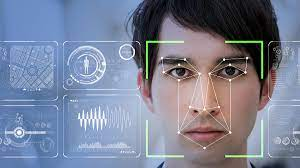

# **Project Title** 

 **Live Class Monitoring System(Face Emotion Recognition)**


# **Project Title** 

 **Live Class Monitoring System(Face Emotion Recognition)**

# **Project Indroduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.

##**Face Emotion Recognition**
This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# We will see two different Approach 
- Pre-trained Model
- Build our own Model

# Pre-Trained Model Approach

We will use DeepFace. DeepFace is a deep learning facial recognition system created by a research group at Facebook. It identifies human faces in digital images. The program employs a nine-layer neural network with over 120 million connection weights and was trained on four million images uploaded by Facebook users.The Facebook Research team has stated that the DeepFace method reaches an accuracy of 97.35% ± 0.25% on Labeled Faces in the Wild (LFW) data set where human beings have 97.53%. This means that DeepFace is sometimes more successful than human beings.

In [ ]:
#Installing Deepface
!pip install deepface

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 10.7 MB/s 
     |████████████████████████████████| 462 kB 40.5 MB/s 


# Loading and Testing Deepface 

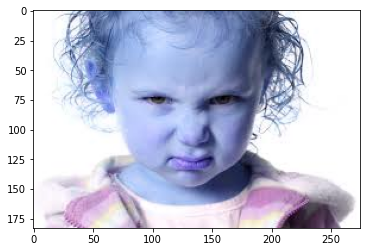

In [ ]:
# loading images
image='/content/drive/MyDrive/project 5: Face Emotion Recognition/angry.jpg'

# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread(image)
plt.imshow(img_array)


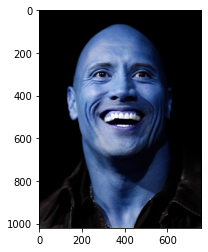

In [ ]:
image1='/content/drive/MyDrive/project 5: Face Emotion Recognition/rock smile.jpg'
img_array2=cv2.imread(image1)
plt.imshow(img_array2)

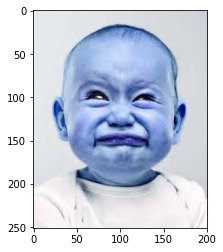

In [ ]:
image2='/content/drive/MyDrive/project 5: Face Emotion Recognition/sad face.jpg'
img_array3=cv2.imread(image2)
plt.imshow(img_array3)

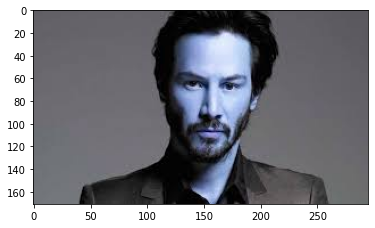

In [ ]:
image3='/content/drive/MyDrive/project 5: Face Emotion Recognition/neutral.jpg'
img_array4=cv2.imread(image3)
plt.imshow(img_array4)

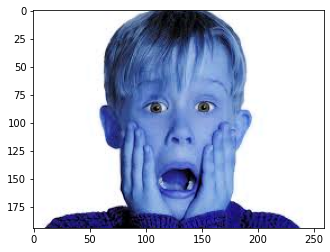

In [ ]:
image4='/content/drive/MyDrive/project 5: Face Emotion Recognition/scared.jpg'
img_array5=cv2.imread(image4)
plt.imshow(img_array5)

# Testing Deepface Model

In [ ]:
# Analyze Image using DeepFace
from deepface import DeepFace
test = DeepFace.analyze(img_path = image, actions = ['age', 'gender', 'race', 'emotion'])
print("Result for Image", test["age"]," years old ",test["dominant_race"]," ",test["dominant_emotion"]," ", test["gender"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

Result for Image 26  years old  white   angry   Man


In [ ]:
test1 = DeepFace.analyze(img_path = image1, actions = ['age', 'gender', 'race', 'emotion'])
print("Result for image1", test1["age"]," years old ",test1["dominant_race"]," ",test1["dominant_emotion"]," ", test1["gender"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

Result for image1 32  years old  black   happy   Man


In [ ]:
test2 = DeepFace.analyze(img_path = image2, actions = ['age', 'gender', 'race', 'emotion'])
print("Result for image1", test2["age"]," years old ",test2["dominant_race"]," ",test2["dominant_emotion"]," ", test2["gender"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

Result for image1 44  years old  asian   sad   Man


In [ ]:
test3 = DeepFace.analyze(img_path = image3, actions = ['age', 'gender', 'race', 'emotion'])
print("Result for image1", test3["age"]," years old ",test3["dominant_race"]," ",test3["dominant_emotion"]," ", test3["gender"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

Result for image1 28  years old  white   neutral   Man


In [ ]:
test4 = DeepFace.analyze(img_path = image4, actions = ['age', 'gender', 'race', 'emotion'])
print("Result for image1", test4["age"]," years old ",test4["dominant_race"]," ",test4["dominant_emotion"]," ", test4["gender"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

Result for image1 33  years old  white   surprise   Man


## **Conclusion**

- As you can see, the image we used shows scared emotion whereas emotion predicted was surprise. . Out of 5, 4 results were good (emotion wise) only 1 got misclassified.
- we can say our pre-trained models is 80% accurate(emotion wise).

# Building Face Emotion Recognition Model

In [1]:
#Importing necessary packages
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential   #Initialise our neural network model as a sequential network
from keras.layers import Conv2D     #Convolution operation
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation  #Applies activation function
from keras.layers import Dropout      #Prevents overfitting by randomly converting few outputs to zero
from keras.layers import MaxPooling2D # Maxpooling function
from keras.layers import Flatten # Converting 2D arrays into a 1D linear vector
from keras.layers import Dense # Regular fully connected neural network
from tensorflow.keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.metrics import accuracy_score

## **Load Dataset**

In [2]:
def load_data(dataset_path): #Run once
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']  #We will be dealing with seven different types of emotions.

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)#Creating a list out of the string then converting it into a 2-Dimensional numpy array.
            image_data =image_data.astype(np.uint8)/255.0
            
            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

### **Splitting dataset**

In [5]:
dataset_path = "/content/drive/MyDrive/project 5: Face Emotion Recognition/fer2013.csv" 
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)



In [6]:
#shape od dataset
print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))

Number of images in Training set: 32298
Number of images in Test set: 3589


## **Model Training**

In [7]:
#######HYPERPARAMATERS###########
epochs = 75
batch_size = 64
learning_rate = 0.001
#################################

model = Sequential()
    
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
print(model.summary())

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('/content/drive/MyDrive/project 5weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(
          train_data,
          train_labels,
          epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.2,
          shuffle = True
          )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       7

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 9,014,727
Trainable params: 9,009,223
Non-trainable params: 5,504
_________________________________________________________________
None
Epoch 1/75
404/404 [==============================] - 73s 152ms/step - loss: 2.0865 - accuracy: 0.2011 - val_loss: 1.8557 - val_accuracy: 0.2489
Epoch 2/75
404/404 [==============================] - 59s 146ms/step - loss: 1.8612 - accuracy: 0.2369 - val_loss: 1.8407 - val_accuracy: 0.2489
Epoch 3/75
404/404 [==============================] - 58s 143ms/step - loss: 1.8417 - accuracy: 0.2480 - val_loss: 1.8268 - val_accuracy: 0.2489
Epoch 4/75
404/404 [==============================] - 58s 143ms/step - loss: 1.8303 - accuracy: 0.2498 - val_loss: 1.8209 - val_accuracy: 0.2489
Epoch

#**Model Accuracy**

In [8]:

predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
test_labels = np.argmax(test_labels, axis=1)
print ("Accuracy score = ", accuracy_score(test_labels, predicted_test_labels))
print ("Accuracy percentage = ", accuracy_score(test_labels, predicted_test_labels)*100, "%")

Accuracy score =  0.620228475898579
Accuracy percentage =  62.022847589857896 %


#**Confusion Matrix**

In [9]:
#Creating labels to classify
labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [10]:
#Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    plt.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

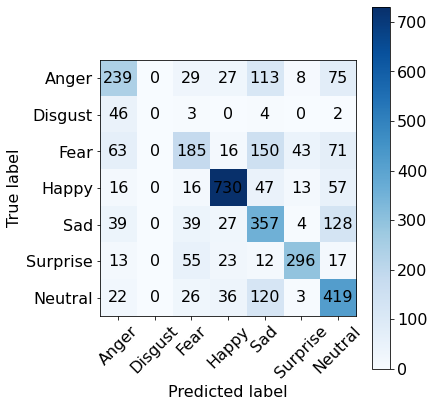

In [11]:
#Plotting confusion matrix
plot_confusion_matrix(test_labels, predicted_test_labels, cmap=plt.cm.Blues)
plt.show()


#**Classification Report**

In [12]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_test_labels, target_names=labels))

              precision    recall  f1-score   support

       Anger       0.55      0.49      0.51       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.52      0.35      0.42       528
       Happy       0.85      0.83      0.84       879
         Sad       0.44      0.60      0.51       594
    Surprise       0.81      0.71      0.76       416
     Neutral       0.54      0.67      0.60       626

    accuracy                           0.62      3589
   macro avg       0.53      0.52      0.52      3589
weighted avg       0.62      0.62      0.61      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Accuracy Graph**

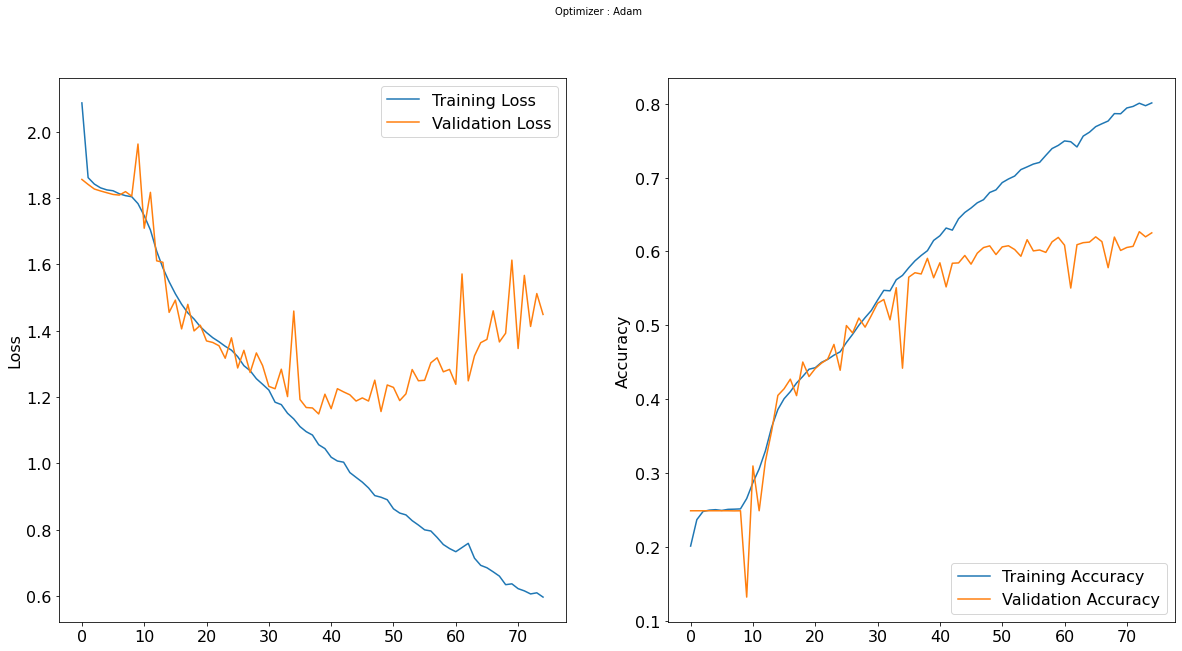

In [13]:
#Plotting Accuracy graph

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

#**Saving Model**

In [14]:
from keras.models import model_from_json
model_json = model.to_json()
with open("/content/drive/MyDrive/Capstone Project 5/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Capstone Project 5/model.hdf5")
print("Saved model to disk")

Saved model to disk


In [15]:
# Saving the whole model along with architecture in FER_model.h5
model.save('/content/drive/MyDrive/Capstone Project 5/FER_model.h5')
print('Model Saved')

Model Saved


In [16]:
import keras

In [17]:
saveBestModel = keras.callbacks.ModelCheckpoint('/best_model.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1,save_freq='epoch')

# **Model Checking**

In [18]:
#Preparation for emotion recognition using photo
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

#**Loading Model**

In [19]:
from keras.models import model_from_json
import numpy as np
import cv2

def load_model(path):

	json_file = open(path + 'model.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	
	model = model_from_json(loaded_model_json)
	model.load_weights(path + "FER_model.h5")
	print("Loaded model from disk")
	return model

In [20]:
#model loading
path = "/content/drive/MyDrive/Capstone Project 5/"
model = load_model(path)

Loaded model from disk


#**Taking Images**

In [ ]:
#code to capture image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
#code to take photo using webcam
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

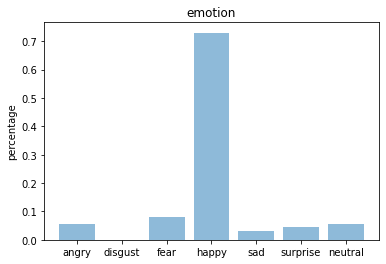

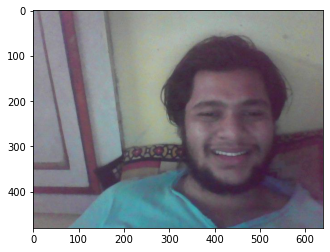

In [ ]:
## Cropping face and analysing photo
import cv2
            
def facecrop(image):  
    facedata = '/content/drive/MyDrive/Capstone Project 5/haarcascade_frontalface_default.xml' 
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 90

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()


# **Run webcam**

- In google colab it isn't possible (for now atleast) to load and use opencv video processing commands. This is due to the fact that cv2.VideoCapture() request local machine to give access of webcam but since google colab which runs on cloud server this command cannot be used. To fill the gap, we used Javascipt to get access of webcam.

In [21]:

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes




# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data